1000


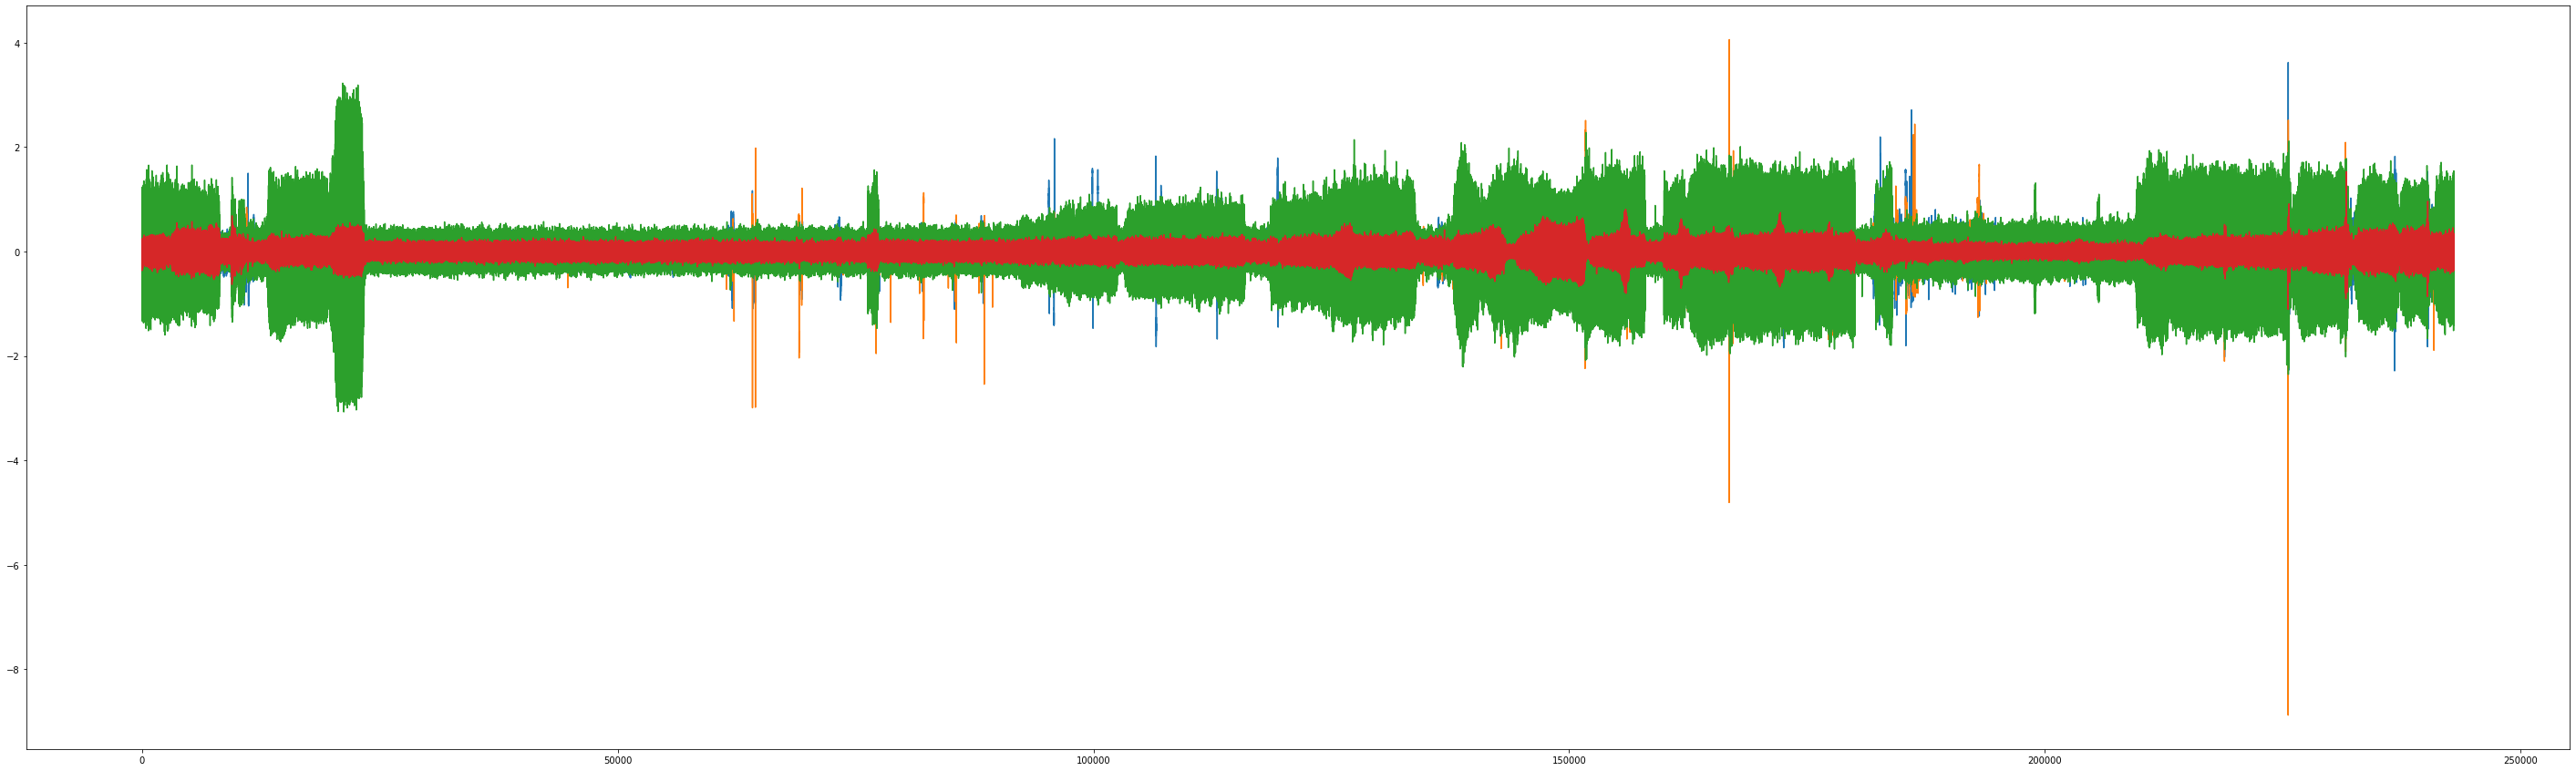

In [36]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels.tsa.seasonal import seasonal_decompose

# load pv data for continuous_1
path = '../dataset/pv/20230309/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=243
ms=False
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    # ts = data[0][1]-data[0][0]
    # fs = int(np.rint(1/ts))
    fs=1000
else:
    # ts = (data[0][1]-data[0][0])/1000
    # fs = int(np.rint(1/ts))
    fs=100

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
pv_det = seasonal_decompose(pv, model='additive', period=75, extrapolate_trend='freq')
pv_denoised = pv-pv_det.trend
# print(pv_denoised.shape)
print(fs)

fig = plt.figure(figsize=[50, 15])
plt.plot(pv_denoised)

(30, 243000)


(1, 50)

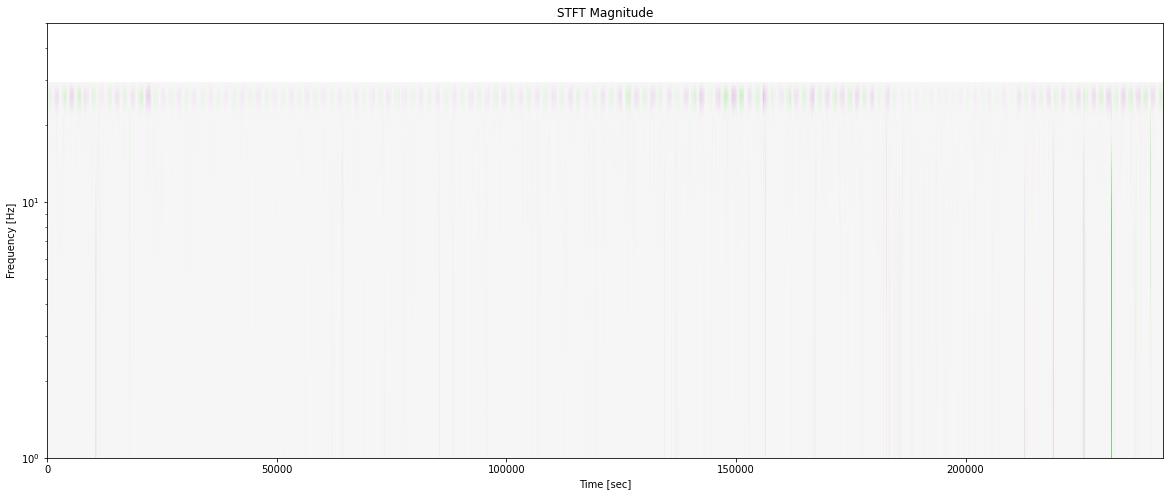

In [38]:
from scipy import signal

continuous_1=[]
widths = np.arange(1, 31)
for ii in range(pv.shape[1]):
# perform fft on pv data with window length of 0.1s
    matr= signal.cwt(pv_denoised[:,ii], signal.ricker, widths)
    continuous_1.append(matr)

print(continuous_1[1].shape)
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()
# ax.set_xlim(0, 4860)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# print(f)
# print(fs)
# plt.pcolormesh(t, f, np.abs(continuous_1[0]),vmax=0.1,vmin=0)
plt.imshow(np.flipud(continuous_1[3]), cmap='PRGn', aspect='auto',
           vmax=abs(matr).max(), vmin=-abs(matr).max())
plt.yscale('log')
plt.ylim(1, 50)
# ax.imshow(np.abs(continuous_1[0]),vmax=0.05,vmin=0,interpolation='nearest',aspect='auto',extent=(np.max(np.abs(continuous_1[0])),np.min(np.abs(continuous_1[0])),np.max(f),np.min(f)))

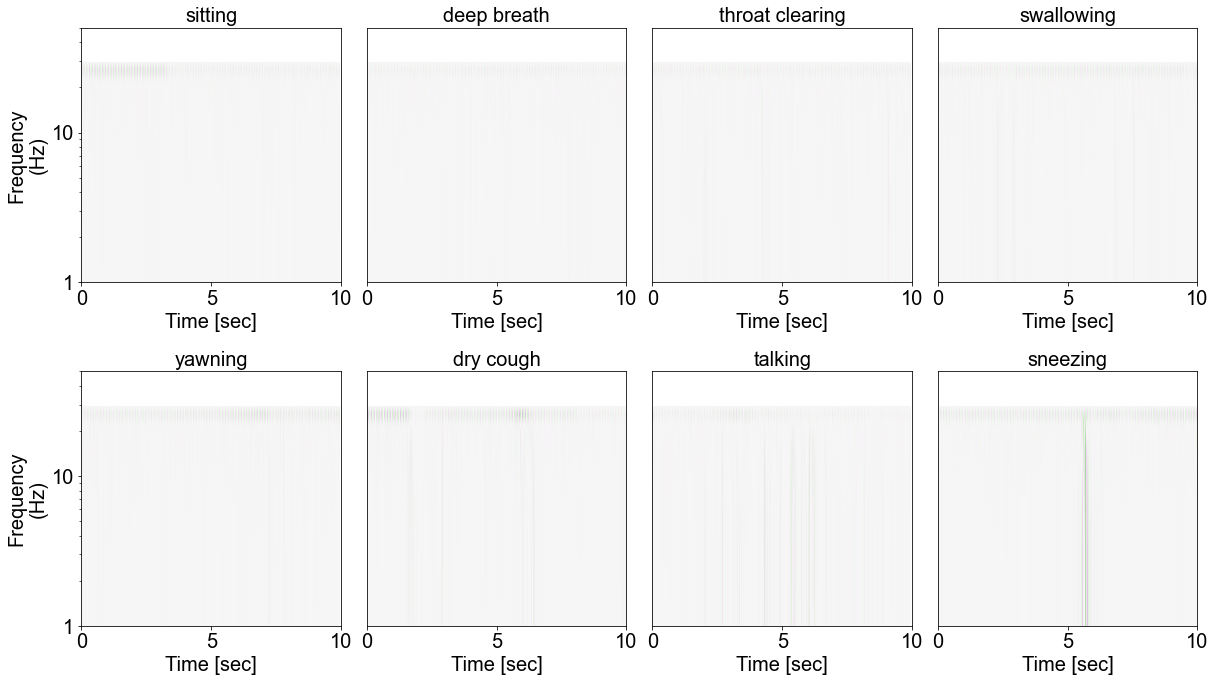

In [35]:
font = {'family': 'arial',
        'weight': 'normal',
        'size': 20,
        }

labels = ['sitting',
          'deep breath',
          'throat clearing',
          'swallowing',
          'yawning',
          'dry cough',
          'talking',
          'sneezing']
left_borders = np.array([20, 31, 60, 93, 120, 150, 180, 220])
right_borders = left_borders+10

fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)

for i,(l,r) in enumerate(zip(left_borders, right_borders)):
    axes[i//4,i-i//4*4].imshow(np.flipud(continuous_1[3]), cmap='PRGn', aspect='auto',
           vmax=abs(matr).max(), vmin=-abs(matr).max())
    axes[i//4,i-i//4*4].set_xlim(1000*l,1000*r)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([1000*l,1000*(l+r)/2,1000*r])
    axes[i//4,i-i//4*4].set_xticklabels([0,5,10],fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

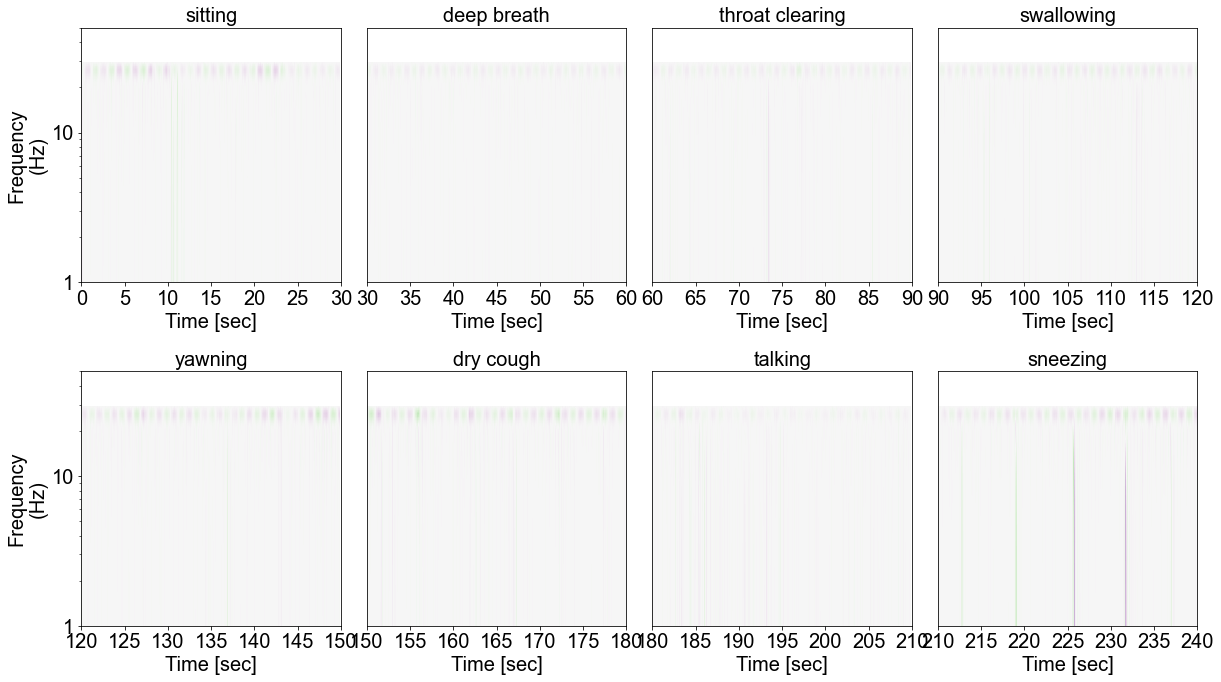

In [39]:
fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)
for i in range(8):
    axes[i//4,i-i//4*4].imshow(np.flipud(continuous_1[3]), cmap='PRGn', aspect='auto',
           vmax=abs(matr).max(), vmin=-abs(matr).max())
    axes[i//4,i-i//4*4].set_xlim(i*30000,i*30000+30000)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([i*30000,i*30000+5000,i*30000+10000,i*30000+15000,i*30000+20000,i*30000+25000,i*30000+30000])
    axes[i//4,i-i//4*4].set_xticklabels(np.array([i*30,i*30+5,i*30+10,i*30+15,i*30+20,i*30+25,i*30+30]),fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [60]:
label_1=np.zeros(480)
# label_1[2]+=1
# label_1[9:12]+=2
# label_1[12:19]+=3
# label_1[19:24]+=4
# label_1[26]+=5
# label_1[28]+=5
# label_1[30:36]+=6
# label_1[36:41]+=7
# label_1[42:44]+=8
# label_1[45:48]+=8

label_1[20:25]+=1
label_1[90:92]+=2
label_1[100:103]+=2
label_1[110:113]+=2
label_1[123:125]+=3
label_1[128:129]+=3
label_1[123:125]+=3
label_1[138:139]+=3
label_1[147:148]+=3
label_1[154:155]+=3
label_1[164:165]+=3
label_1[170:171]+=3
label_1[176:177]+=3
label_1[190:193]+=4
label_1[200:201]+=4
label_1[213:215]+=4
label_1[226:228]+=4
label_1[238:240]+=4
label_1[255:256]+=5
label_1[272:274]+=5
label_1[303:304]+=6
label_1[312:313]+=6
label_1[323:325]+=6
label_1[333:335]+=6
label_1[344:345]+=6
label_1[354:356]+=6
label_1[364:414]+=7
label_1[425:426]+=8
label_1[437:438]+=8
label_1[451:452]+=8
label_1[463:465]+=8
label_1[473:474]+=8
for i in range(len(label_1)):
    if label_1[i]==3 or label_1[i]==6:
        label_1[i]=1
    elif label_1[i]==0:
        label_1[i]=0
    else:
        label_1[i]=2
label_1=np.repeat(label_1,100)

In [25]:
path = '../dataset/orientation/20230309/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=1, delimiter='\t',header=None)
start_s=0
end_s=243
ms=True
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    # ts = data[0][1]-data[0][0]
    # fs = int(np.rint(1/ts))
    fs=1000
else:
    # ts = (data[0][1]-data[0][0])/1000
    # fs = int(np.rint(1/ts))
    fs=100

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)

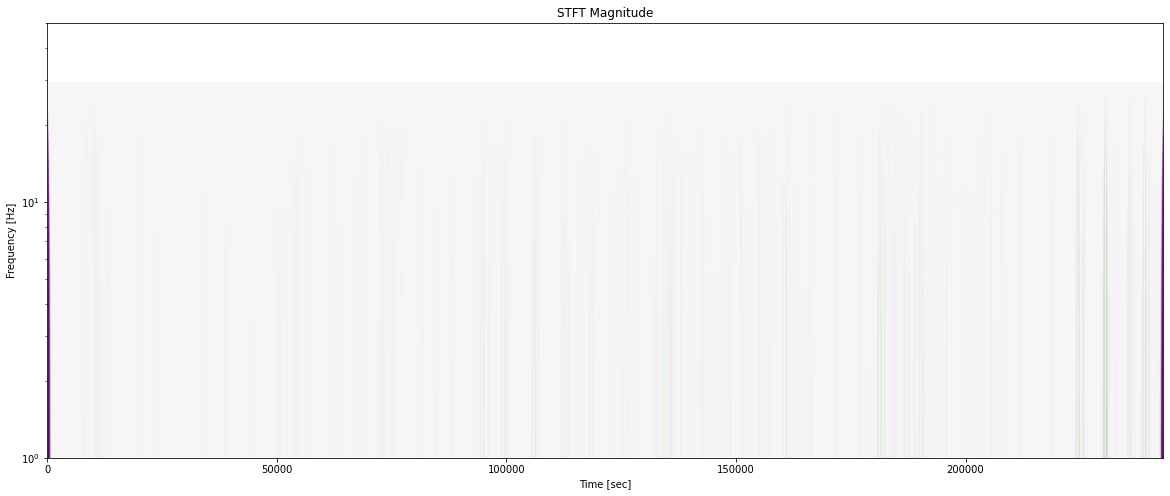

In [41]:
orientation_1=[]
for ii in range(orientation.shape[1]):
# perform fft on pv data with window length of 0.1s
    matr= signal.cwt(orientation[:,ii], signal.ricker, widths)
    interpolated_matr=[]
    for i in range(30):
        interpolated_matr.append(np.interp(np.arange(1,243001,1),np.arange(1,243001,10),matr[i]))
    orientation_1.append(interpolated_matr)
orientation_1=np.array(orientation_1)
# print(np.shape(t))
# print(orientation_1[1].shape)
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()
# ax.set_xlim(0, 4860)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# print(f)
# print(fs)
plt.imshow(np.flipud(orientation_1[2]), cmap='PRGn', aspect='auto',
           vmax=abs(interpolated_matr[-1]).max(), vmin=-abs(interpolated_matr[-1]).max())
plt.yscale('log')
plt.ylim(1, 50)
# print(orientation_1.shape)
# print(np.sum(np.array(np.where(orientation_1[0,...]>0, 1, 0))))

plt.show()

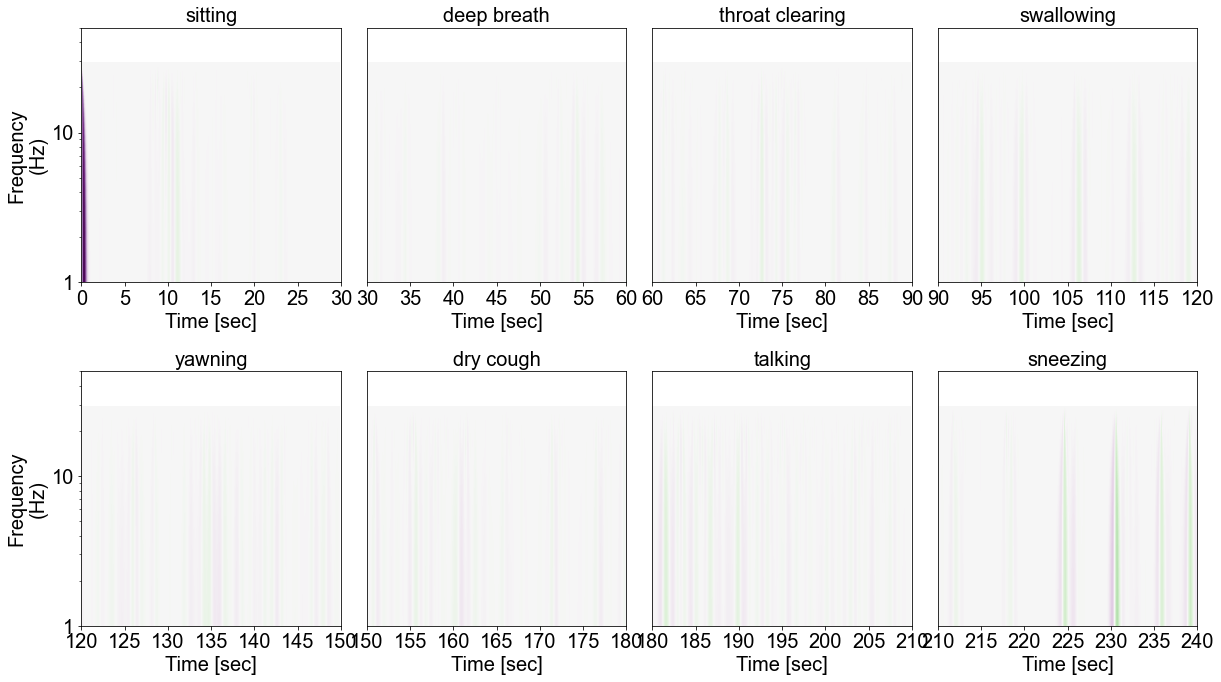

In [42]:
fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)
for i in range(8):
    axes[i//4,i-i//4*4].imshow(np.flipud(orientation_1[2]), cmap='PRGn', aspect='auto',
           vmax=abs(matr).max(), vmin=-abs(matr).max())
    axes[i//4,i-i//4*4].set_xlim(i*30000,i*30000+30000)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([i*30000,i*30000+5000,i*30000+10000,i*30000+15000,i*30000+20000,i*30000+25000,i*30000+30000])
    axes[i//4,i-i//4*4].set_xticklabels(np.array([i*30,i*30+5,i*30+10,i*30+15,i*30+20,i*30+25,i*30+30]),fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [52]:
continuous_1_full=[]
print(np.array(orientation_1).shape)
print(np.array(continuous_1).shape)
for j in np.arange(0,240000,5):
    for i in range(4):    
        if i==0:
            continuous_1_combine = np.array(continuous_1[i][:,j:j+5])
        else:
            continuous_1_combine = np.concatenate((continuous_1_combine, np.array(continuous_1[i][:,j:j+5])),axis=-1)
    for i in range(3):
        continuous_1_combine = np.concatenate((continuous_1_combine, np.array(orientation_1[i][:,j:j+5])),axis=-1)
    continuous_1_full.append(continuous_1_combine)
# print(continuous_1_full)
continuous_1_full=torch.from_numpy(np.array(continuous_1_full).astype('float32'))
print(continuous_1_full.size())

(3, 30, 243000)
(4, 30, 242000)
torch.Size([48000, 30, 35])


Loading the continuous_1 data from 0324 to serve as test data

In [44]:
from scipy import signal
path = '../dataset/pv/20230324/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=6, delimiter='\t',header=None)
start_s=0
end_s=242
ms=False
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    # ts = data[0][1]-data[0][0]
    # fs = int(np.rint(1/ts))
    fs=1000
else:
    # ts = (data[0][1]-data[0][0])/1000
    # fs = int(np.rint(1/ts))
    fs=100

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
pv_det = seasonal_decompose(pv, model='additive', period=75, extrapolate_trend='freq')
pv_denoised = pv-pv_det.trend

continuous_1=[]
for ii in range(pv.shape[1]):
# perform fft on pv data with window length of 0.1s
    matr= signal.cwt(pv_denoised[:,ii], signal.ricker, widths)
    continuous_1.append(matr)

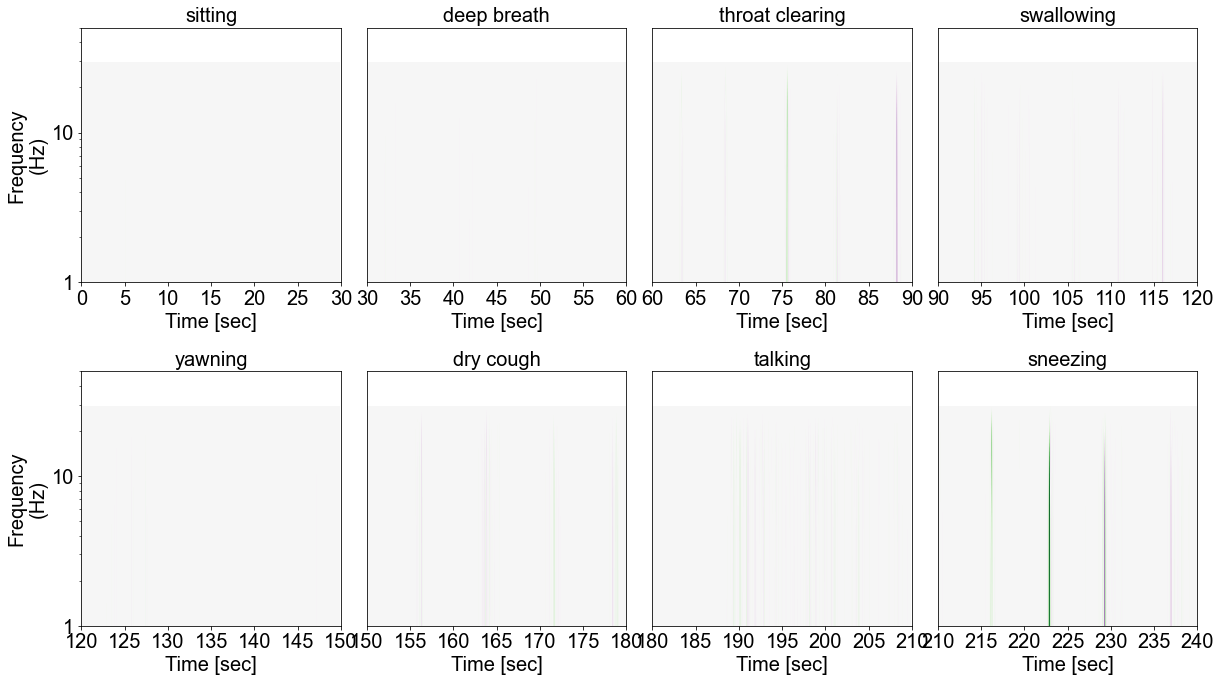

In [45]:
fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)
for i in range(8):
    axes[i//4,i-i//4*4].imshow(np.flipud(continuous_1[3]), cmap='PRGn', aspect='auto',
           vmax=abs(matr).max(), vmin=-abs(matr).max())
    axes[i//4,i-i//4*4].set_xlim(i*30000,i*30000+30000)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([i*30000,i*30000+5000,i*30000+10000,i*30000+15000,i*30000+20000,i*30000+25000,i*30000+30000])
    axes[i//4,i-i//4*4].set_xticklabels(np.array([i*30,i*30+5,i*30+10,i*30+15,i*30+20,i*30+25,i*30+30]),fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [59]:
label_1_test=np.zeros(480)
# label_1_test[0:3]+=1
# label_1_test[6]+=2
# label_1_test[8:10]+=2
# label_1_test[11]+=2

# label_1_test[12:14]+=3
# label_1_test[15:18]+=3

# label_1_test[18:24]+=4

# label_1_test[24:26]+=5
# label_1_test[28:30]+=5

# label_1_test[31:36]+=6

# label_1_test[37:43]+=7

# label_1_test[43:46]+=8
# label_1_test[47]+=8

label_1_test[1:2]+=1
label_1_test[20:21]+=1

label_1_test[64:68]+=2
label_1_test[81:85]+=2
label_1_test[97:100]+=2

label_1_test[125:128]+=3
label_1_test[136:138]+=3
label_1_test[150:154]+=3
label_1_test[162:165]+=3
label_1_test[175:178]+=3

label_1_test[186:190]+=4
label_1_test[199:202]+=4
label_1_test[211:213]+=4
label_1_test[221:223]+=4
label_1_test[230:232]+=4

label_1_test[245:256]+=5
label_1_test[290:300]+=5

label_1_test[311:314]+=6
label_1_test[325:331]+=6
label_1_test[342:347]+=6
label_1_test[355:358]+=6

label_1_test[377:420]+=7

label_1_test[431:434]+=8
label_1_test[444:447]+=8
label_1_test[456:460]+=8
label_1_test[474:477]+=8
for i in range(len(label_1_test)):
    if label_1_test[i]==3 or label_1_test[i]==6:
        label_1_test[i]=1
    elif label_1_test[i]==0:
        label_1_test[i]=0
    else:
        label_1_test[i]=2
label_1_test=np.repeat(label_1_test,100)

In [46]:
path = '../dataset/orientation/20230324/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=1, delimiter='\t',header=None)
start_s=0
end_s=243
ms=True
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    # ts = data[0][1]-data[0][0]
    # fs = int(np.rint(1/ts))
    fs=1000
else:
    # ts = (data[0][1]-data[0][0])/1000
    # print(ts)
    # fs = int(np.rint(1/ts))
    fs=100

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
orientation_1=[]
for ii in range(orientation.shape[1]):
# perform swt on pv data with window length of 0.1s
    matr= signal.cwt(orientation[:,ii], signal.ricker, widths)
    interpolated_matr=[]
    for i in range(30):
        interpolated_matr.append(np.interp(np.arange(1,243001,1),np.arange(1,243001,10),matr[i]))
    orientation_1.append(interpolated_matr)
orientation_1=np.array(orientation_1)
print(orientation_1.shape)

(3, 30, 243000)


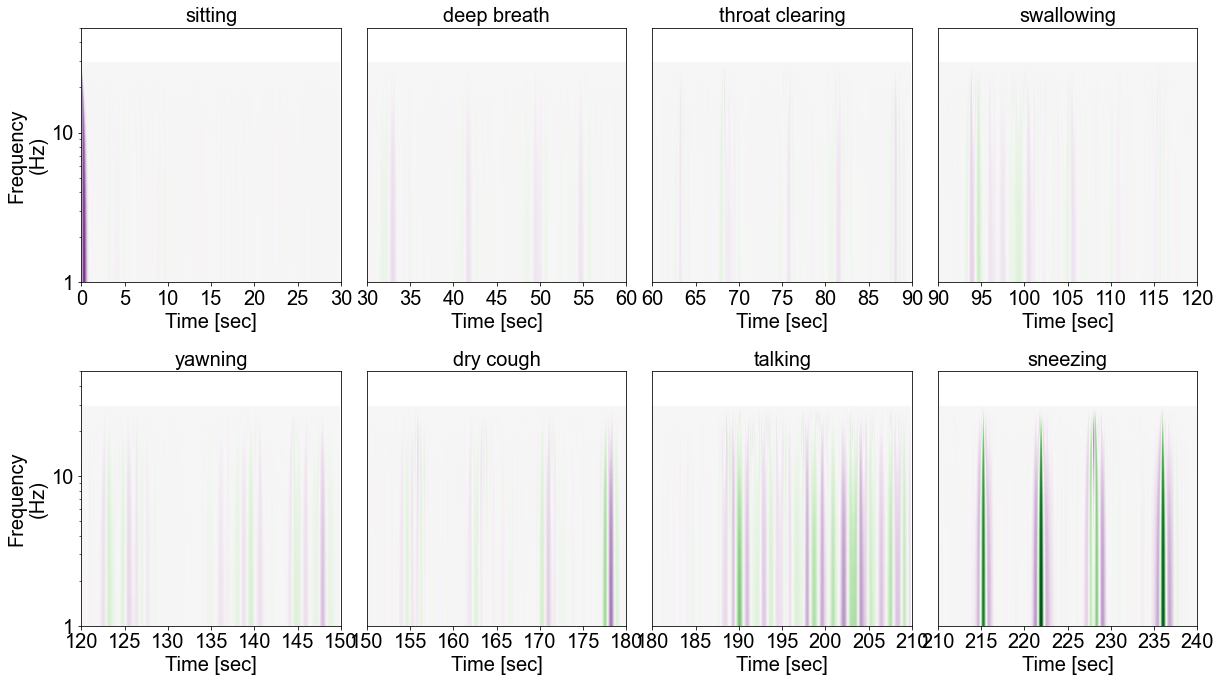

In [47]:
fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)
for i in range(8):
    axes[i//4,i-i//4*4].imshow(np.flipud(orientation_1[2]), cmap='PRGn', aspect='auto',
           vmax=abs(interpolated_matr[-1]).max(), vmin=-abs(interpolated_matr[-1]).max())
    axes[i//4,i-i//4*4].set_xlim(i*30000,i*30000+30000)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([i*30000,i*30000+5000,i*30000+10000,i*30000+15000,i*30000+20000,i*30000+25000,i*30000+30000])
    axes[i//4,i-i//4*4].set_xticklabels(np.array([i*30,i*30+5,i*30+10,i*30+15,i*30+20,i*30+25,i*30+30]),fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [50]:
continuous_1_test=[]
for j in np.arange(0,240000,5):
    for i in range(4):    
        if i==0:
            continuous_1_combine = np.array(continuous_1[i][:,j:j+5])
        else:
            continuous_1_combine = np.concatenate((continuous_1_combine, np.array(continuous_1[i][:,j:j+5])),axis=-1)
    for i in range(3):
        continuous_1_combine = np.concatenate((continuous_1_combine, np.array(orientation_1[i][:,j:j+5])),axis=-1)
    continuous_1_test.append(continuous_1_combine)
# print(continuous_1_full)
continuous_1_test=torch.from_numpy(np.array(continuous_1_test).astype('float32'))
print(continuous_1_test.size())

torch.Size([48000, 30, 35])


In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

In [75]:
'''input of size [N,C,H, W]
N==>batch size,
C==> number of channels,
H==> height of input planes in pixels,
W==> width in pixels.
'''

# define the input with below info
N=2
C=7
H=51
W=16

torch.manual_seed(30047)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 3, 3) # output: 3*28*33
        self.pool = nn.MaxPool2d(2, 1) # output: 3*27*32
        self.conv2 = nn.Conv2d(3, 6, 3) # output: 6*25*30
                                        # output: 6*24*29
        self.fc1 = nn.Linear(6 * 24*29, 120)
        self.fc2 = nn.Linear(120, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.unsqueeze(0))))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net=Net()
    
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print(net(continuous_1_full[0]))

tensor([-0.0981, -0.0441,  0.0156], grad_fn=<AddBackward0>)


In [76]:
# np.random.seed(30047)
# null_index=np.where(label_1_test==0)
# index=np.where(label_1_test!=0)
# null_sample=np.random.choice(np.asarray(null_index).squeeze(0),20,replace=False)
# indices=np.concatenate((np.asarray(index).squeeze(0),null_sample))
# print(indices.shape)
# test_indices=np.random.choice(np.asarray([i for i in range(480)]),250,replace=False)
np.random.seed(3047)
index=np.random.choice(np.asarray([i for i in range(48000)]),48000,replace=False)
train_index=index[:24000]
test_index=index[24001:]
print(len(train_index))

24000


In [62]:
print(label_1.shape)
print(continuous_1_full.shape)
print(continuous_1_test.shape)

(48000,)
torch.Size([48000, 30, 35])
torch.Size([48000, 30, 35])


Finished Training


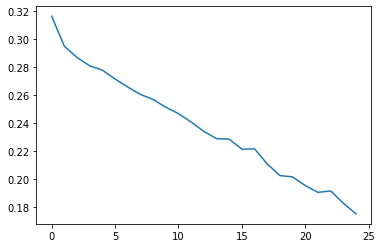

In [77]:
train_losses=[]
test_losses=[]
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    # for i, (input,label) in enumerate(zip(continuous_1_full,torch.from_numpy(label_1).type(torch.long))):
    #     net.zero_grad()
    #     outputs=net(input)
    #     loss=criterion(outputs,label)
    #     loss.backward()
    #     optimizer.step()
    #     running_loss+=loss.item()
    for i in train_index:
        # zero the parameter gradients
        net.zero_grad()

        # forward + backward + optimize
        outputs = net(continuous_1_test[i])
        loss = criterion(outputs, torch.from_numpy(label_1_test).type(torch.long)[i])
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    train_losses.append(running_loss/i)

    with torch.no_grad():
        # testing_loss=0
        # for i, (input,label) in enumerate(zip(continuous_1_test,torch.from_numpy(label_1_test).type(torch.long))):
        #     outputs=net(input)
        #     loss=criterion(outputs,label)
        #     testing_loss+=loss.item()
        testing_loss=0
        count=0
        for i in test_index:
        # zero the parameter gradients
            output = net(continuous_1_test[i])
            loss = criterion(output, torch.from_numpy(label_1_test).type(torch.long)[i])
            testing_loss+=loss.item()
            count+=1
        test_losses.append(testing_loss/i)

plt.plot(train_losses)
# plt.plot(test_losses)
print('Finished Training')
# print(net(continuous_1_tensor[3]))

In [72]:
print(train_losses)

[0.4861447107919078, 0.4837840885014661, 0.48378408855525945, 0.4837840885536537, 0.48378408855124505]


In [73]:
test_losses

[3.498909227838318,
 3.498909227838318,
 3.498909227838318,
 3.498909227838318,
 3.498909227838318]

Text(0, 0.5, 'Losses')

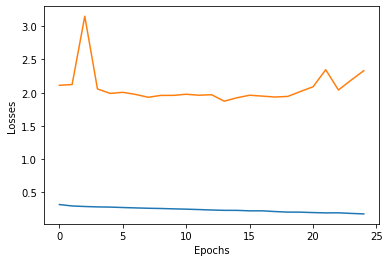

In [78]:

plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")
# plt.savefig("loss.png")

(48000, 30, 35)
(48000,)


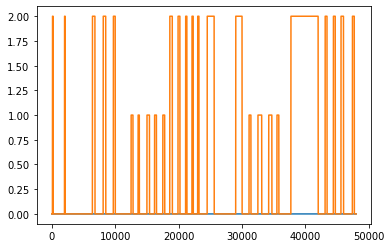

In [65]:
outputs=[]
print(np.array(continuous_1_full).shape)
with torch.no_grad():
    for input in continuous_1_test:
        output = torch.argmax(net(input))
        outputs.append(output.item())
print(np.array(outputs).shape)
plt.plot(outputs)
plt.plot(label_1_test)